In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy.contrasts import Sum
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy.contrasts import Sum
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')
import pingouin as pg

/Users/caffarra/anaconda3/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Load Behavioral Data

In [2]:
#prek_wide.to_csv('prek_wide.csv')

In [3]:
path_to_prek = '/Users/caffarra/Documents/Projects/PREK/analyses/prek_3year.csv'
prek_behav = pd.read_csv(path_to_prek)
prek_behav

,subID,event,group,AlphabetKnowledge_Upper,AlphabetKnowledge_Lower,Decoding,PhonemeMatching,PhonemeSegmenting,EVTRaw,Retell,Grammar,PDE,SWE,WJ_BRS,Age,AlphabetKnowledge,visit
0,1103,Visit 2,Language,23,26,0,7,1.0,86,16.0,12.0,NaN,NaN,NaN,66.377117,49,pre
1,1103,Visit 3,Language,40,19,0,8,0.0,91,15.0,12.0,NaN,NaN,NaN,67.067044,59,post
2,1103,Visit 4,Language,50,49,14,13,7.0,101,17.0,11.0,108.0,99.0,105.0,77.737443,99,oneyear
3,1110,Visit 2,Language,46,44,4,12,2.0,94,21.0,14.0,NaN,NaN,NaN,61.777951,90,pre
4,1110,Visit 3,Language,48,45,0,12,3.0,97,12.0,11.0,NaN,NaN,NaN,63.389044,93,post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2213,Visit 3,Letter,36,31,1,7,1.0,79,NaN,NaN,NaN,NaN,NaN,189.773690,67,post
173,2244,Visit 2,Letter,36,29,0,5,1.0,73,NaN,NaN,NaN,NaN,NaN,61.550614,65,pre
174,2244,Visit 3,Letter,42,43,0,8,1.0,81,NaN,NaN,NaN,NaN,NaN,62.242914,85,post
175,2259,Visit 2,Letter,42,35,0,13,2.0,86,NaN,NaN,NaN,NaN,NaN,0.252113,77,pre


## Filter data based on DTI

In [4]:
# get the subject of the DTI study
sj_dti= [1103, 1110, 1112, 1113, 1184, 1208, 1210, 1241, 1262, 1271, 1293, 1302, 1372, 1382, 1391, 1401, 1443, 1460, 1490, 1505, 1673, 1676,
       1691, 1706, 1714, 1715, 1750, 1751, 1756, 1762, 1768, 1790, 1798, 1812, 1818, 1868, 1869, 1878, 1887, 1901, 1916, 1921, 1936, 1939,
       1940, 1951, 1964, 1966]
prek_behav_dti = prek_behav[prek_behav.subID.isin(sj_dti)]
len(np.unique(prek_behav_dti.subID))


48

In [5]:
prek_behav_dti[~prek_behav_dti['visit'].isin(['oneyear'])]

,subID,event,group,AlphabetKnowledge_Upper,AlphabetKnowledge_Lower,Decoding,PhonemeMatching,PhonemeSegmenting,EVTRaw,Retell,Grammar,PDE,SWE,WJ_BRS,Age,AlphabetKnowledge,visit
0,1103,Visit 2,Language,23,26,0,7,1.0,86,16.0,12.0,NaN,NaN,NaN,66.377117,49,pre
1,1103,Visit 3,Language,40,19,0,8,0.0,91,15.0,12.0,NaN,NaN,NaN,67.067044,59,post
3,1110,Visit 2,Language,46,44,4,12,2.0,94,21.0,14.0,NaN,NaN,NaN,61.777951,90,pre
4,1110,Visit 3,Language,48,45,0,12,3.0,97,12.0,11.0,NaN,NaN,NaN,63.389044,93,post
6,1112,Visit 2,Letter,14,9,0,12,4.0,66,13.0,10.0,NaN,NaN,NaN,64.869735,23,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1951,Visit 3,Letter,50,48,16,10,4.0,105,10.0,10.0,NaN,NaN,NaN,70.287679,98,post
135,1964,Visit 2,Letter,21,22,0,9,0.0,71,12.0,10.0,NaN,NaN,NaN,57.972628,43,pre
136,1964,Visit 3,Letter,28,28,7,11,1.0,74,14.0,12.0,NaN,NaN,NaN,59.122500,56,post
138,1966,Visit 2,Language,46,40,0,14,4.0,105,13.0,9.0,NaN,NaN,NaN,73.575750,86,pre


## Statistical comparison at T0

In [8]:
ttest_ind(data_2tp_letter.AlphabetKnowledge, data_2tp_language.AlphabetKnowledge, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-0.5671033402436261, pvalue=0.5719957722403831)

In [12]:
ttest_ind(data_2tp_letter.Decoding, data_2tp_language.Decoding, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=0.2757656525104285, pvalue=0.7833333944846438)

In [13]:
ttest_ind(data_2tp_letter.PhonemeMatching, data_2tp_language.PhonemeMatching, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-0.8648665867119212, pvalue=0.38931381238680174)

In [15]:
ttest_ind(data_2tp_letter['PhonemeSegmenting'].dropna(), data_2tp_language['PhonemeSegmenting'].dropna(), equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-1.1307810310123219, pvalue=0.2610864859425328)

In [16]:
ttest_ind(data_2tp_letter.EVTRaw, data_2tp_language.EVTRaw, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-1.0289518870146557, pvalue=0.3061426651263537)

In [18]:
ttest_ind(data_2tp_letter['Retell'].dropna(), data_2tp_language['Retell'].dropna(), equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-1.2029990638528825, pvalue=0.23203031282580056)

In [19]:
ttest_ind(data_2tp_letter.Grammar, data_2tp_language.Grammar, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-0.8149767082985087, pvalue=0.41714571062472494)

# Clean dataset based on MRI

In [8]:
data_2tp

,subID,event,group,AlphabetKnowledge_Upper,AlphabetKnowledge_Lower,Decoding,PhonemeMatching,PhonemeSegmenting,EVTRaw,Retell,Grammar,PDE,SWE,WJ_BRS,Age,AlphabetKnowledge,visit
0,1103,Visit 2,Language,23,26,0,7,1.0,86,16.0,12.0,NaN,NaN,NaN,66.377117,49,pre
1,1103,Visit 3,Language,40,19,0,8,0.0,91,15.0,12.0,NaN,NaN,NaN,67.067044,59,post
3,1110,Visit 2,Language,46,44,4,12,2.0,94,21.0,14.0,NaN,NaN,NaN,61.777951,90,pre
4,1110,Visit 3,Language,48,45,0,12,3.0,97,12.0,11.0,NaN,NaN,NaN,63.389044,93,post
6,1112,Visit 2,Letter,14,9,0,12,4.0,66,13.0,10.0,NaN,NaN,NaN,64.869735,23,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1951,Visit 3,Letter,50,48,16,10,4.0,105,10.0,10.0,NaN,NaN,NaN,70.287679,98,post
135,1964,Visit 2,Letter,21,22,0,9,0.0,71,12.0,10.0,NaN,NaN,NaN,57.972628,43,pre
136,1964,Visit 3,Letter,28,28,7,11,1.0,74,14.0,12.0,NaN,NaN,NaN,59.122500,56,post
138,1966,Visit 2,Language,46,40,0,14,4.0,105,13.0,9.0,NaN,NaN,NaN,73.575750,86,pre


In [9]:
bad_sj = [1241, 1113, 1939, 1966, 1812, 1443, 1184, 1715, 1382, 1691, 1372, 1936, 1751]
data_2tp_clean = data_2tp[data_2tp['subID'].isin(bad_sj)==False]
print('number of subjects with 2 data points: ', str(len(data_2tp_clean)/2))

number of subjects with 2 data points:  35.0


## Plots with clean subset

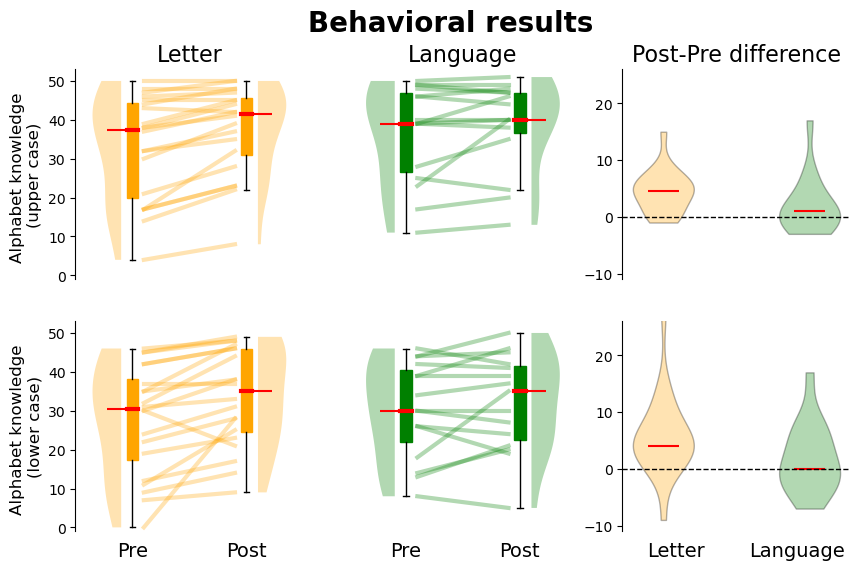

In [10]:
# create mini df from the clean subset

data_2tp_letter = data_2tp_clean[data_2tp_clean['group'].isin(['Letter'])]
data_2tp_language = data_2tp_clean[data_2tp_clean['group'].isin(['Language'])]


# define the hack function
def hack_violin(ax, side='left', color='blue'):
    for b in ax['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.set_facecolor(color)
        # modify the paths to not go further right than the center
        if side == 'left':
            b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        else:
            b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)


# Create a figure and axes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10,6))
fig.suptitle('Behavioral results', fontweight="bold", size = 20)

########################## UPPER CASE ###########################
letter_pre = data_2tp_letter.AlphabetKnowledge_Upper[data_2tp_letter['visit'].isin(['pre'])]
letter_post = data_2tp_letter.AlphabetKnowledge_Upper[data_2tp_letter['visit'].isin(['post'])]
language_pre = data_2tp_language.AlphabetKnowledge_Upper[data_2tp_language['visit'].isin(['pre'])]
language_post = data_2tp_language.AlphabetKnowledge_Upper[data_2tp_language['visit'].isin(['post'])]


## letter plot 
# Combine violin plot, box plot, and line plot
violin_left = ax1.violinplot(letter_pre, positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax1.violinplot(letter_post, positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')

box = ax1.boxplot([letter_pre, letter_post], positions=[1, 2], patch_artist= True, widths=0.1, showfliers=False, boxprops=dict(facecolor='orange', color='orange'), medianprops=dict(color= 'red', linewidth=3))
line = ax1.plot([1.10, 1.9], np.array([letter_pre, letter_post]), color='orange', lw=3, alpha=0.3)

hack_violin(violin_left, side='left', color = 'orange')
hack_violin(violin_right, side='right', color = 'orange')

# Customize the plot
ax1.set_xticks([1, 2])
ax1.set_xticklabels([])
ax1.set_ylabel('Value')
ax1.set_title('Letter', size = 16)
ax1.set_ylim([-1,53])
#ax1.axis('off')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_ylabel('Alphabet knowledge \n(upper case)', size = 12)
ax1.xaxis.set_ticks_position('none') 


## language plot
# Combine violin plot, box plot, and line plot
violin_left = ax2.violinplot(language_pre, positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax2.violinplot(language_post, positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')

box = ax2.boxplot([language_pre, language_post], positions=[1, 2], patch_artist= True, widths=0.1, showfliers=False, boxprops=dict(facecolor='green', color='green'), medianprops=dict(color='red', linewidth=3))
line = ax2.plot([1.10, 1.9], np.array([language_pre, language_post]), color='green', lw=3, alpha=0.3)

hack_violin(violin_left, side='left', color = 'green')
hack_violin(violin_right, side='right', color = 'green')

# Customize the plot
ax2.set_xticks([1, 2])
ax2.set_xticklabels([])
ax2.set_ylabel('Value')
ax2.set_title('Language', size = 16)
ax2.set_ylim([-1,53])
#ax2.axis('off')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_yaxis().set_ticks([])
ax2.set_ylabel('')
ax2.xaxis.set_ticks_position('none') 

violin_left = ax3.violinplot(pd.DataFrame(letter_post).reset_index(drop = True)-pd.DataFrame(letter_pre).reset_index(drop = True), positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax3.violinplot(pd.DataFrame(language_post).reset_index(drop = True)-pd.DataFrame(language_pre).reset_index(drop = True), positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
plt.setp(violin_left['bodies'], facecolor='orange', edgecolor='black')
plt.setp(violin_right['bodies'], facecolor='green', edgecolor='black')
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')
ax3.axhline(y=0.0, color='black', linestyle='--', linewidth=1) 
ax3.set_title('Post-Pre difference', size = 16)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.set_ylim([-11,26])
ax3.set_xticks([])

########################## LOWER CASE ###########################
letter_pre = data_2tp_letter.AlphabetKnowledge_Lower[data_2tp_letter['visit'].isin(['pre'])]
letter_post = data_2tp_letter.AlphabetKnowledge_Lower[data_2tp_letter['visit'].isin(['post'])]
language_pre = data_2tp_language.AlphabetKnowledge_Lower[data_2tp_language['visit'].isin(['pre'])]
language_post = data_2tp_language.AlphabetKnowledge_Lower[data_2tp_language['visit'].isin(['post'])]


## letter plot 
# Combine violin plot, box plot, and line plot
violin_left = ax4.violinplot(letter_pre, positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax4.violinplot(letter_post, positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')

box = ax4.boxplot([letter_pre, letter_post], positions=[1, 2], patch_artist= True, widths=0.1, showfliers=False, boxprops=dict(facecolor='orange', color='orange'), medianprops=dict(color= 'red', linewidth=3))
line = ax4.plot([1.10, 1.9], np.array([letter_pre, letter_post]), color='orange', lw=3, alpha=0.3)

hack_violin(violin_left, side='left', color = 'orange')
hack_violin(violin_right, side='right', color = 'orange')

# Customize the plot
ax4.set_xticks([1, 2])
ax4.set_xticklabels(['Pre', 'Post'], size = 14)
ax4.set_ylabel('Value')
ax4.set_ylim([-1,53])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_ylabel('Alphabet knowledge \n(lower case)', size = 12)
ax4.xaxis.set_ticks_position('none') 


## language plot
# Combine violin plot, box plot, and line plot
violin_left = ax5.violinplot(language_pre, positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax5.violinplot(language_post, positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')

box = ax5.boxplot([language_pre, language_post], positions=[1, 2], patch_artist= True, widths=0.1, showfliers=False, boxprops=dict(facecolor='green', color='green'), medianprops=dict(color='red', linewidth=3))
line = ax5.plot([1.10, 1.9], np.array([language_pre, language_post]), color='green', lw=3, alpha=0.3)

hack_violin(violin_left, side='left', color = 'green')
hack_violin(violin_right, side='right', color = 'green')

# Customize the plot
ax5.set_xticks([1, 2])
ax5.set_xticklabels(['Pre', 'Post'], size = 14)
ax5.set_ylabel('Value')
ax5.set_ylim([-1,53])
#ax2.axis('off')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.get_yaxis().set_ticks([])
ax5.set_ylabel('')
ax5.xaxis.set_ticks_position('none') 

violin_left = ax6.violinplot(pd.DataFrame(letter_post).reset_index(drop = True)-pd.DataFrame(letter_pre).reset_index(drop = True), positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax6.violinplot(pd.DataFrame(language_post).reset_index(drop = True)-pd.DataFrame(language_pre).reset_index(drop = True), positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
plt.setp(violin_left['bodies'], facecolor='orange', edgecolor='black')
plt.setp(violin_right['bodies'], facecolor='green', edgecolor='black')
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')
ax6.axhline(y=0.0, color='black', linestyle='--', linewidth=1) 
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.set_ylim([-11,26])
ax6.set_xticks([1,2])
ax6.set_xticklabels(['Letter', 'Language'], size = 14)
ax6.xaxis.set_ticks_position('none') 


# Show the plot
plt.show()

In [52]:
fig.savefig('behaviral_results_clean_n35.tiff', format='tiff', dpi=1200)

## Adding Decoding to the plot

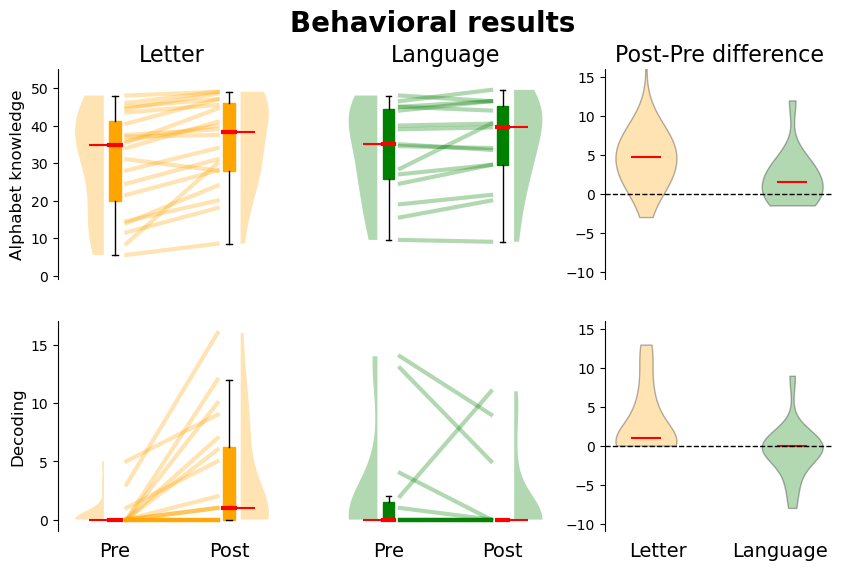

In [12]:
# create mini df from the clean subset
data_2tp_clean['AlphabetKnowledge'] = (data_2tp_clean['AlphabetKnowledge_Upper'] + data_2tp_clean['AlphabetKnowledge_Lower'])/2
data_2tp_letter = data_2tp_clean[data_2tp_clean['group'].isin(['Letter'])]
data_2tp_language = data_2tp_clean[data_2tp_clean['group'].isin(['Language'])]


# define the hack function
def hack_violin(ax, side='left', color='blue'):
    for b in ax['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.set_facecolor(color)
        # modify the paths to not go further right than the center
        if side == 'left':
            b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        else:
            b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)


# Create a figure and axes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10,6))
fig.suptitle('Behavioral results', fontweight="bold", size = 20)

########################## Alphabet knowledge ###########################
letter_pre = data_2tp_letter.AlphabetKnowledge[data_2tp_letter['visit'].isin(['pre'])]
letter_post = data_2tp_letter.AlphabetKnowledge[data_2tp_letter['visit'].isin(['post'])]
language_pre = data_2tp_language.AlphabetKnowledge[data_2tp_language['visit'].isin(['pre'])]
language_post = data_2tp_language.AlphabetKnowledge[data_2tp_language['visit'].isin(['post'])]


## letter plot 
# Combine violin plot, box plot, and line plot
violin_left = ax1.violinplot(letter_pre, positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax1.violinplot(letter_post, positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')

box = ax1.boxplot([letter_pre, letter_post], positions=[1, 2], patch_artist= True, widths=0.1, showfliers=False, boxprops=dict(facecolor='orange', color='orange'), medianprops=dict(color= 'red', linewidth=3))
line = ax1.plot([1.10, 1.9], np.array([letter_pre, letter_post]), color='orange', lw=3, alpha=0.3)

hack_violin(violin_left, side='left', color = 'orange')
hack_violin(violin_right, side='right', color = 'orange')

# Customize the plot
ax1.set_xticks([1, 2])
ax1.set_xticklabels([])
ax1.set_ylabel('Value')
ax1.set_title('Letter', size = 16)
ax1.set_ylim([-1,55])
#ax1.axis('off')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_ylabel('Alphabet knowledge', size = 12)
ax1.xaxis.set_ticks_position('none') 


## language plot
# Combine violin plot, box plot, and line plot
violin_left = ax2.violinplot(language_pre, positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax2.violinplot(language_post, positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')

box = ax2.boxplot([language_pre, language_post], positions=[1, 2], patch_artist= True, widths=0.1, showfliers=False, boxprops=dict(facecolor='green', color='green'), medianprops=dict(color='red', linewidth=3))
line = ax2.plot([1.10, 1.9], np.array([language_pre, language_post]), color='green', lw=3, alpha=0.3)

hack_violin(violin_left, side='left', color = 'green')
hack_violin(violin_right, side='right', color = 'green')

# Customize the plot
ax2.set_xticks([1, 2])
ax2.set_xticklabels([])
ax2.set_ylabel('Value')
ax2.set_title('Language', size = 16)
ax2.set_ylim([-1,55])
#ax2.axis('off')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_yaxis().set_ticks([])
ax2.set_ylabel('')
ax2.xaxis.set_ticks_position('none') 

violin_left = ax3.violinplot(pd.DataFrame(letter_post).reset_index(drop = True)-pd.DataFrame(letter_pre).reset_index(drop = True), positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax3.violinplot(pd.DataFrame(language_post).reset_index(drop = True)-pd.DataFrame(language_pre).reset_index(drop = True), positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
plt.setp(violin_left['bodies'], facecolor='orange', edgecolor='black')
plt.setp(violin_right['bodies'], facecolor='green', edgecolor='black')
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')
ax3.axhline(y=0.0, color='black', linestyle='--', linewidth=1) 
ax3.set_title('Post-Pre difference', size = 16)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.set_ylim([-11,16])
ax3.set_xticks([])

########################## Decoding ###########################
letter_pre = data_2tp_letter.Decoding[data_2tp_letter['visit'].isin(['pre'])]
letter_post = data_2tp_letter.Decoding[data_2tp_letter['visit'].isin(['post'])]
language_pre = data_2tp_language.Decoding[data_2tp_language['visit'].isin(['pre'])]
language_post = data_2tp_language.Decoding[data_2tp_language['visit'].isin(['post'])]


## letter plot 
# Combine violin plot, box plot, and line plot
violin_left = ax4.violinplot(letter_pre, positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax4.violinplot(letter_post, positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')

box = ax4.boxplot([letter_pre, letter_post], positions=[1, 2], patch_artist= True, widths=0.1, showfliers=False, boxprops=dict(facecolor='orange', color='orange'), medianprops=dict(color= 'red', linewidth=3))
line = ax4.plot([1.10, 1.9], np.array([letter_pre, letter_post]), color='orange', lw=3, alpha=0.3)

hack_violin(violin_left, side='left', color = 'orange')
hack_violin(violin_right, side='right', color = 'orange')

# Customize the plot
ax4.set_xticks([1, 2])
ax4.set_xticklabels(['Pre', 'Post'], size = 14)
ax4.set_ylabel('Value')
ax4.set_ylim([-1,17])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_ylabel('Decoding', size = 12)
ax4.xaxis.set_ticks_position('none') 


## language plot
# Combine violin plot, box plot, and line plot
violin_left = ax5.violinplot(language_pre, positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax5.violinplot(language_post, positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')

box = ax5.boxplot([language_pre, language_post], positions=[1, 2], patch_artist= True, widths=0.1, showfliers=False, boxprops=dict(facecolor='green', color='green'), medianprops=dict(color='red', linewidth=3))
line = ax5.plot([1.10, 1.9], np.array([language_pre, language_post]), color='green', lw=3, alpha=0.3)

hack_violin(violin_left, side='left', color = 'green')
hack_violin(violin_right, side='right', color = 'green')

# Customize the plot
ax5.set_xticks([1, 2])
ax5.set_xticklabels(['Pre', 'Post'], size = 14)
ax5.set_ylabel('Value')
ax5.set_ylim([-1,17])
#ax2.axis('off')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.get_yaxis().set_ticks([])
ax5.set_ylabel('')
ax5.xaxis.set_ticks_position('none') 

violin_left = ax6.violinplot(pd.DataFrame(letter_post).reset_index(drop = True)-pd.DataFrame(letter_pre).reset_index(drop = True), positions=[0.9], showmedians=True, showextrema=False, widths=0.5)
violin_right = ax6.violinplot(pd.DataFrame(language_post).reset_index(drop = True)-pd.DataFrame(language_pre).reset_index(drop = True), positions=[2.1], showmedians=True, showextrema=False, widths=0.5)
plt.setp(violin_left['bodies'], facecolor='orange', edgecolor='black')
plt.setp(violin_right['bodies'], facecolor='green', edgecolor='black')
violin_left['cmedians'].set_colors('red')
violin_right['cmedians'].set_colors('red')
ax6.axhline(y=0.0, color='black', linestyle='--', linewidth=1) 
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.set_ylim([-11,16])
ax6.set_xticks([1,2])
ax6.set_xticklabels(['Letter', 'Language'], size = 14)
ax6.xaxis.set_ticks_position('none') 


# Show the plot
plt.show()

In [45]:
fig.savefig('behaviral_results_clean_decoding_n35.tiff', format='tiff', dpi=600)

# Clean the dataset for the behavioral analysis

In [13]:
# keep all clean subjects regardless of whether they have two time points or only one

data_2tp_clean_lmer = data_2tp[data_2tp['subID'].isin([1241])==False]

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1113) & (data_2tp_clean_lmer.visit == 'post')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1939) & (data_2tp_clean_lmer.visit == 'post')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1966) & (data_2tp_clean_lmer.visit == 'pre')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1812) & (data_2tp_clean_lmer.visit == 'post')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1443) & (data_2tp_clean_lmer.visit == 'pre')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1184) & (data_2tp_clean_lmer.visit == 'post')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1715) & (data_2tp_clean_lmer.visit == 'pre')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1382) & (data_2tp_clean_lmer.visit == 'pre')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1691) & (data_2tp_clean_lmer.visit == 'post')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1372) & (data_2tp_clean_lmer.visit == 'pre')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1936) & (data_2tp_clean_lmer.visit == 'pre')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

index = data_2tp_clean_lmer[(data_2tp_clean_lmer.subID == 1751) & (data_2tp_clean_lmer.visit == 'pre')].index # movement
data_2tp_clean_lmer.drop(index, inplace = True)

## Check whether the numbers coincides with the MRI version

In [14]:
# get the overall number of subject
print('Number of participants in Letter Pre '+ str(len(np.unique(data_2tp_clean_lmer.subID[(data_2tp_clean_lmer.group=='Letter') & (data_2tp_clean_lmer.visit =='pre')]))))
print('Number of participants in Letter Post '+ str(len(np.unique(data_2tp_clean_lmer.subID[(data_2tp_clean_lmer.group=='Letter') & (data_2tp_clean_lmer.visit =='post')]))))
print('Number of participants in Language Pre '+ str(len(np.unique(data_2tp_clean_lmer.subID[(data_2tp_clean_lmer.group=='Language') & (data_2tp_clean_lmer.visit =='pre')]))))
print('Number of participants in Language Post '+ str(len(np.unique(data_2tp_clean_lmer.subID[(data_2tp_clean_lmer.group=='Language') & (data_2tp_clean_lmer.visit =='post')]))))

Number of participants in Letter Pre 21
Number of participants in Letter Post 22
Number of participants in Language Pre 19
Number of participants in Language Post 20


# LMER with the clean dataset

### Alphabet knowledge

In [16]:
data_2tp_clean_lmer['AlphabetKnowledge'] = (data_2tp_clean_lmer['AlphabetKnowledge_Upper'] + data_2tp_clean_lmer['AlphabetKnowledge_Lower'])/2

In [21]:
# deviation coding
levels = [1,2]
contrast = Sum().code_without_intercept(levels)
print(contrast.matrix)

# general mixed linear model
data_2tp_clean_lmer['group'] = data_2tp_clean_lmer['group'].astype('category')
data_2tp_clean_lmer['visit'] = data_2tp_clean_lmer['visit'].astype('category')
data_2tp_clean_lmer['group'].cat.reorder_categories(['Letter', 'Language'], inplace=True)
data_2tp_clean_lmer['visit'].cat.reorder_categories(['post', 'pre'], inplace=True)
md = smf.mixedlm("AlphabetKnowledge ~ C(visit,Sum)*C(group, Sum)", data_2tp_clean_lmer, groups= 'subID',  missing ='drop', re_formula="~C(visit)")
mdf = md.fit()
print(mdf.summary())

[[ 1.]
 [-1.]]
                          Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         AlphabetKnowledge
No. Observations:           82              Method:                     REML             
No. Groups:                 47              Scale:                      8.6767           
Min. group size:            1               Log-Likelihood:             -279.7550        
Max. group size:            2               Converged:                  Yes              
Mean group size:            1.7                                                          
-----------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                      33.163    1.803 18.392 0.000 29.629 36.697
C(visit, Sum)[S.post]

In [82]:
# Letter group

# general mixed linear model
md = smf.mixedlm("AlphabetKnowledge ~ C(visit, Sum)", data_2tp_clean_lmer[data_2tp_clean_lmer.group == 'Letter'], groups= 'subID',  missing ='drop', re_formula="~C(visit, Sum)")
mdf = md.fit()
print(mdf.summary())

                   Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     AlphabetKnowledge
No. Observations:      43          Method:                 REML             
No. Groups:            23          Scale:                  16.9885          
Min. group size:       1           Log-Likelihood:         -149.8863        
Max. group size:       2           Converged:              Yes              
Mean group size:       1.9                                                  
----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                         32.812    2.175 15.083 0.000 28.548 37.076
C(visit, Sum)[S.post]              2.770    0.784  3.532 0.000  1.233  4.308
subID Var                         98.633    6.969                           
subID x C(visit, Su

In [83]:
# Language group

# general mixed linear model
md = smf.mixedlm("AlphabetKnowledge ~ C(visit, Sum)", data_2tp_clean_lmer[data_2tp_clean_lmer.group == 'Language'], groups= 'subID',  missing ='drop', re_formula="~C(visit, Sum)")
mdf = md.fit()
print(mdf.summary())

                   Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     AlphabetKnowledge
No. Observations:      39          Method:                 REML             
No. Groups:            24          Scale:                  16.5350          
Min. group size:       1           Log-Likelihood:         -134.6133        
Max. group size:       2           Converged:              No               
Mean group size:       1.6                                                  
----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                         33.609    2.054 16.364 0.000 29.583 37.634
C(visit, Sum)[S.post]              0.896    0.776  1.154 0.248 -0.625  2.416
subID Var                         89.522    8.966                           
subID x C(visit, Su

### Decoding models

In [25]:
# deviation coding
levels = [1,2]
contrast = Sum().code_without_intercept(levels)
print(contrast.matrix)

# general mixed linear model
data_2tp_clean_lmer['group'] = data_2tp_clean_lmer['group'].astype('category')
data_2tp_clean_lmer['visit'] = data_2tp_clean_lmer['visit'].astype('category')
data_2tp_clean_lmer['group'].cat.reorder_categories(['Letter', 'Language'], inplace=True)
data_2tp_clean_lmer['visit'].cat.reorder_categories(['post', 'pre'], inplace=True)
md = smf.mixedlm("Decoding ~ C(visit,Sum)*C(group, Sum)", data_2tp_clean_lmer, groups= 'subID',  missing ='drop', re_formula="~C(visit)")
mdf = md.fit()
print(mdf.summary())

[[ 1.]
 [-1.]]
                         Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           Decoding 
No. Observations:             82                Method:                       REML     
No. Groups:                   47                Scale:                        6.2392   
Min. group size:              1                 Log-Likelihood:               -217.9322
Max. group size:              2                 Converged:                    Yes      
Mean group size:              1.7                                                      
---------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------
Intercept                                      1.853    0.491 3.774 0.000  0.891  2.815
C(visit, Sum)[S.post]                     

In [84]:
# Letter group 
md = smf.mixedlm("Decoding ~ C(visit,Sum)", data_2tp_clean_lmer[data_2tp_clean_lmer.group == 'Letter'], groups= 'subID',  missing ='drop', re_formula="~C(visit, Sum)")
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       Decoding
No. Observations:         43            Method:                   REML    
No. Groups:               23            Scale:                    0.9541  
Min. group size:          1             Log-Likelihood:           -98.3621
Max. group size:          2             Converged:                Yes     
Mean group size:          1.9                                             
--------------------------------------------------------------------------
                                  Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                         2.171    0.639 3.397 0.001  0.919  3.424
C(visit, Sum)[S.post]             1.689    0.496 3.403 0.001  0.716  2.661
subID Var                         8.675                                   
subID x C(visit, Sum)[S.post] Cov 6.447     

In [85]:
# Language group 
md = smf.mixedlm("Decoding ~ C(visit,Sum)", data_2tp_clean_lmer[data_2tp_clean_lmer.group == 'Language'], groups= 'subID',  missing ='drop', re_formula="~C(visit, Sum)")
mdf = md.fit()
print(mdf.summary())

                   Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        Decoding 
No. Observations:        39             Method:                    REML     
No. Groups:              24             Scale:                     3.6909   
Min. group size:         1              Log-Likelihood:            -100.2279
Max. group size:         2              Converged:                 Yes      
Mean group size:         1.6                                                
----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                          1.494    0.686  2.180 0.029  0.151  2.838
C(visit, Sum)[S.post]             -0.194    0.415 -0.469 0.639 -1.007  0.618
subID Var                          8.492                                    
subID x C(visit, Su

In [27]:
# Phoneme Matching
levels = [1,2]
contrast = Sum().code_without_intercept(levels)
print(contrast.matrix)

# general mixed linear model
data_2tp_clean_lmer['group'] = data_2tp_clean_lmer['group'].astype('category')
data_2tp_clean_lmer['visit'] = data_2tp_clean_lmer['visit'].astype('category')
data_2tp_clean_lmer['group'].cat.reorder_categories(['Letter', 'Language'], inplace=True)
data_2tp_clean_lmer['visit'].cat.reorder_categories(['post', 'pre'], inplace=True)
md = smf.mixedlm("PhonemeMatching ~ C(visit,Sum)*C(group, Sum)", data_2tp_clean_lmer, groups= 'subID',  missing ='drop', re_formula="~C(visit)")
mdf = md.fit()
print(mdf.summary())

[[ 1.]
 [-1.]]
                         Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          PhonemeMatching
No. Observations:          82               Method:                      REML           
No. Groups:                47               Scale:                       3.8500         
Min. group size:           1                Log-Likelihood:              -192.9296      
Max. group size:           2                Converged:                   Yes            
Mean group size:           1.7                                                          
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                     10.363    0.305 33.977 0.000  9.765 10.960
C(visit, Sum)[S.post]           

In [29]:
md = smf.mixedlm("PhonemeSegmenting ~ C(visit,Sum)*C(group, Sum)", data_2tp_clean_lmer, groups= 'subID',  missing ='drop', re_formula="~C(visit)")
mdf = md.fit()
print(mdf.summary())

                         Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         PhonemeSegmenting
No. Observations:          80              Method:                     REML             
No. Groups:                47              Scale:                      0.7654           
Min. group size:           1               Log-Likelihood:             -151.0295        
Max. group size:           2               Converged:                  Yes              
Mean group size:           1.7                                                          
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      1.634    0.260  6.271 0.000  1.123  2.144
C(visit, Sum)[S.post]                          

In [31]:
md = smf.mixedlm("EVTRaw ~ C(visit,Sum)*C(group, Sum)", data_2tp_clean_lmer, groups= 'subID',  missing ='drop', re_formula="~C(visit)")
mdf = md.fit()
print(mdf.summary())

                          Mixed Linear Model Regression Results
Model:                        MixedLM            Dependent Variable:            EVTRaw   
No. Observations:             82                 Method:                        REML     
No. Groups:                   47                 Scale:                         32.8629  
Min. group size:              1                  Log-Likelihood:                -303.3464
Max. group size:              2                  Converged:                     Yes      
Mean group size:              1.7                                                        
-----------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                      84.919    1.804 47.083 0.000 81.384 88.454
C(visit, Sum)[S.post]               

In [33]:
md = smf.mixedlm("Retell ~ C(visit,Sum)*C(group, Sum)", data_2tp_clean_lmer, groups= 'subID',  missing ='drop', re_formula="~C(visit)")
mdf = md.fit()
print(mdf.summary())

                         Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Retell   
No. Observations:            81                 Method:                        REML     
No. Groups:                  47                 Scale:                         15.0070  
Min. group size:             1                  Log-Likelihood:                -240.7012
Max. group size:             2                  Converged:                     Yes      
Mean group size:             1.7                                                        
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                     12.357    0.575 21.508 0.000 11.231 13.483
C(visit, Sum)[S.post]                          

In [35]:
md = smf.mixedlm("Grammar ~ C(visit,Sum)*C(group, Sum)", data_2tp_clean_lmer, groups= 'subID',  missing ='drop', re_formula="~C(visit)")
mdf = md.fit()
print(mdf.summary())

                         Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Grammar  
No. Observations:            82                 Method:                        REML     
No. Groups:                  47                 Scale:                         4.4102   
Min. group size:             1                  Log-Likelihood:                -203.8806
Max. group size:             2                  Converged:                     Yes      
Mean group size:             1.7                                                        
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      9.506    0.374 25.435 0.000  8.774 10.239
C(visit, Sum)[S.post]                          

In [46]:
md = smf.mixedlm("Decoding ~ C(visit,Sum)*C(group, Sum)", data_2tp_clean_lmer, groups= 'subID',  missing ='drop')
mdf = md.fit()
print(mdf.summary())

                        Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           Decoding 
No. Observations:            82                Method:                       REML     
No. Groups:                  47                Scale:                        8.0950   
Min. group size:             1                 Log-Likelihood:               -221.1911
Max. group size:             2                 Converged:                    Yes      
Mean group size:             1.7                                                      
--------------------------------------------------------------------------------------
                                              Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------
Intercept                                     1.881    0.501 3.757 0.000  0.900  2.863
C(visit, Sum)[S.post]                         0.712    0.328 2.174 0

## Calculate Cohen's d for the interaction

In [31]:
let_pre = data_2tp_letter.AlphabetKnowledge[data_2tp_letter['visit'].isin(['pre'])]
let_post = data_2tp_letter.AlphabetKnowledge[data_2tp_letter['visit'].isin(['post'])]
lan_pre = data_2tp_language.AlphabetKnowledge[data_2tp_language['visit'].isin(['pre'])]
lan_post = data_2tp_language.AlphabetKnowledge[data_2tp_language['visit'].isin(['post'])]

diff_lett = pd.DataFrame(let_post).reset_index(drop = True)-pd.DataFrame(let_pre).reset_index(drop = True)
diff_lan = pd.DataFrame(lan_post).reset_index(drop = True)-pd.DataFrame(lan_pre).reset_index(drop = True)
pg.compute_effsize(diff_lett, diff_lan, paired=False, eftype='cohen')

0.7255299684222811

In [32]:
pg.compute_effsize(let_post, let_pre, paired=False, eftype='cohen')

0.40579810169629715

In [35]:
let_pre = data_2tp_letter.Decoding[data_2tp_letter['visit'].isin(['pre'])]
let_post = data_2tp_letter.Decoding[data_2tp_letter['visit'].isin(['post'])]
lan_pre = data_2tp_language.Decoding[data_2tp_language['visit'].isin(['pre'])]
lan_post = data_2tp_language.Decoding[data_2tp_language['visit'].isin(['post'])]

diff_lett = pd.DataFrame(let_post).reset_index(drop = True)-pd.DataFrame(let_pre).reset_index(drop = True)
diff_lan = pd.DataFrame(lan_post).reset_index(drop = True)-pd.DataFrame(lan_pre).reset_index(drop = True)
pg.compute_effsize(diff_lett, diff_lan, paired=False, eftype='cohen')

0.9085935299186778

In [36]:
pg.compute_effsize(let_post, let_pre, paired=False, eftype='cohen')

0.854656087919965

## DTI and Behavior correlations

In [19]:
data_2tp_clean

,subID,event,group,AlphabetKnowledge_Upper,AlphabetKnowledge_Lower,Decoding,PhonemeMatching,PhonemeSegmenting,EVTRaw,Retell,Grammar,PDE,SWE,WJ_BRS,Age,AlphabetKnowledge,visit
0,1103,Visit 2,Language,23,26,0,7,1.0,86,16.0,12.0,NaN,NaN,NaN,66.377117,24.5,pre
1,1103,Visit 3,Language,40,19,0,8,0.0,91,15.0,12.0,NaN,NaN,NaN,67.067044,29.5,post
3,1110,Visit 2,Language,46,44,4,12,2.0,94,21.0,14.0,NaN,NaN,NaN,61.777951,45.0,pre
4,1110,Visit 3,Language,48,45,0,12,3.0,97,12.0,11.0,NaN,NaN,NaN,63.389044,46.5,post
6,1112,Visit 2,Letter,14,9,0,12,4.0,66,13.0,10.0,NaN,NaN,NaN,64.869735,11.5,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1940,Visit 3,Language,35,24,0,10,1.0,94,NaN,12.0,NaN,NaN,NaN,64.935803,29.5,post
132,1951,Visit 2,Letter,50,46,3,12,2.0,85,15.0,11.0,NaN,NaN,NaN,69.206499,48.0,pre
133,1951,Visit 3,Letter,50,48,16,10,4.0,105,10.0,10.0,NaN,NaN,NaN,70.287679,49.0,post
135,1964,Visit 2,Letter,21,22,0,9,0.0,71,12.0,10.0,NaN,NaN,NaN,57.972628,21.5,pre


In [20]:
# Load DTI data
path_to_prek = '/Users/caffarra/Documents/Projects/PREK/analyses/PREK_tracts.csv'
dti = pd.read_csv(path_to_prek)
# rescale the MD values
dti['dti_md_rescale'] = dti.dti_md*1000
dti_bysj = dti.groupby(['subjectID','sessionID','Group','tractID'], as_index=False).agg({'dti_md_rescale':'median', 'dti_fa':'median'})


In [21]:
dti_bysj

,subjectID,sessionID,Group,tractID,dti_md_rescale,dti_fa
0,1103,post,1,ARC_L,0.702265,0.473157
1,1103,post,1,ARC_R,0.720568,0.477737
2,1103,post,1,ATR_L,0.693850,0.400026
3,1103,post,1,ATR_R,0.688043,0.400445
4,1103,post,1,CGC_L,0.693614,0.495994
...,...,...,...,...,...,...
1723,1966,pre,1,ILF_R,0.786940,0.479389
1724,1966,pre,1,SLF_L,0.742955,0.429920
1725,1966,pre,1,SLF_R,0.743196,0.427950
1726,1966,pre,1,UNC_L,0.824253,0.420458


In [22]:
# Merge dti and Behavior on the 35 clean participants with 2 data points
dti_behav_clean = pd.merge(data_2tp_clean, dti_bysj, left_on = ['subID','visit'], right_on = ['subjectID','sessionID'])
dti_behav_clean

,subID,event,group,AlphabetKnowledge_Upper,AlphabetKnowledge_Lower,Decoding,PhonemeMatching,PhonemeSegmenting,EVTRaw,Retell,...,WJ_BRS,Age,AlphabetKnowledge,visit,subjectID,sessionID,Group,tractID,dti_md_rescale,dti_fa
0,1103,Visit 2,Language,23,26,0,7,1.0,86,16.0,...,NaN,66.377117,24.5,pre,1103,pre,1,ARC_L,0.703374,0.515062
1,1103,Visit 2,Language,23,26,0,7,1.0,86,16.0,...,NaN,66.377117,24.5,pre,1103,pre,1,ARC_R,0.736257,0.502536
2,1103,Visit 2,Language,23,26,0,7,1.0,86,16.0,...,NaN,66.377117,24.5,pre,1103,pre,1,ATR_L,0.724076,0.412516
3,1103,Visit 2,Language,23,26,0,7,1.0,86,16.0,...,NaN,66.377117,24.5,pre,1103,pre,1,ATR_R,0.713523,0.406328
4,1103,Visit 2,Language,23,26,0,7,1.0,86,16.0,...,NaN,66.377117,24.5,pre,1103,pre,1,CGC_L,0.719451,0.521574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1964,Visit 3,Letter,28,28,7,11,1.0,74,14.0,...,NaN,59.122500,28.0,post,1964,post,0,ILF_R,0.769150,0.503413
1256,1964,Visit 3,Letter,28,28,7,11,1.0,74,14.0,...,NaN,59.122500,28.0,post,1964,post,0,SLF_L,0.696656,0.464593
1257,1964,Visit 3,Letter,28,28,7,11,1.0,74,14.0,...,NaN,59.122500,28.0,post,1964,post,0,SLF_R,0.708252,0.446169
1258,1964,Visit 3,Letter,28,28,7,11,1.0,74,14.0,...,NaN,59.122500,28.0,post,1964,post,0,UNC_L,0.762996,0.456754


In [25]:
# from long to wide format
prek_dti_wide = dti_behav_clean.pivot_table(index = ['Group', 'subjectID'], columns = ['tractID','sessionID'], values = ['dti_md_rescale','dti_fa','AlphabetKnowledge','Decoding']).reset_index()

# column names in one line
prek_dti_wide.columns = [c[1] + '_' + c[0] + '_'+ c[2] for c in prek_dti_wide.columns]

# Add the post-pre differences
tract_list = ['ARC_L', 'ILF_L']
scalar_list_post_pre= ['dti_md_rescale','dti_fa']
for tract in tract_list:
    for scalar in scalar_list_post_pre:
        prek_dti_wide[tract+ '_'+ scalar + '_diff'] = prek_dti_wide[tract+ '_'+ scalar + '_post'] - prek_dti_wide[tract+ '_'+ scalar + '_pre']
        prek_dti_wide[tract+ '_Alph_diff'] = prek_dti_wide[tract+ '_AlphabetKnowledge_post'] - prek_dti_wide[tract+ '_AlphabetKnowledge_pre']
        prek_dti_wide[tract+ '_Dec_diff'] = prek_dti_wide[tract+ '_Decoding_post'] - prek_dti_wide[tract+ '_Decoding_pre']



prek_dti_wide = prek_dti_wide.sort_values(by=['_Group_', '_subjectID_'], ascending = [False,True]).reset_index()
# double check the order
#prek_wide.subID_== prek_dti_wide._subjectID_
prek_dti_wide

,index,_Group_,_subjectID_,ARC_L_AlphabetKnowledge_post,ARC_L_AlphabetKnowledge_pre,ARC_R_AlphabetKnowledge_post,ARC_R_AlphabetKnowledge_pre,ATR_L_AlphabetKnowledge_post,ATR_L_AlphabetKnowledge_pre,ATR_R_AlphabetKnowledge_post,...,UNC_R_dti_md_rescale_post,UNC_R_dti_md_rescale_pre,ARC_L_dti_md_rescale_diff,ARC_L_Alph_diff,ARC_L_Dec_diff,ARC_L_dti_fa_diff,ILF_L_dti_md_rescale_diff,ILF_L_Alph_diff,ILF_L_Dec_diff,ILF_L_dti_fa_diff
0,20,1,1103,29.5,24.5,29.5,24.5,29.5,24.5,29.5,...,0.758729,0.762343,-0.001108,5.0,0,-0.041905,-0.014153,5.0,0,-0.023325
1,21,1,1110,46.5,45.0,46.5,45.0,46.5,45.0,46.5,...,0.781515,0.772315,-0.007606,1.5,-4,-0.004508,0.000679,1.5,-4,-0.009077
2,22,1,1208,20.0,15.5,20.0,15.5,20.0,15.5,20.0,...,0.799931,0.796211,0.002124,4.5,0,-0.018832,0.008402,4.5,0,-0.017426
3,23,1,1262,21.5,19.0,21.5,19.0,21.5,19.0,21.5,...,0.759709,0.752113,-0.005727,2.5,0,0.033984,-0.018498,2.5,0,0.024185
4,24,1,1271,33.5,35.0,33.5,35.0,33.5,35.0,33.5,...,0.785729,0.783698,0.033887,-1.5,0,0.028151,0.017679,-1.5,0,0.014395
5,25,1,1302,40.5,28.5,40.5,28.5,40.5,28.5,40.5,...,0.758355,0.769708,-0.009547,12.0,0,-0.016412,0.003355,12.0,0,-0.015126
6,26,1,1460,46.5,48.0,46.5,48.0,46.5,48.0,46.5,...,0.745595,0.752805,-0.002525,-1.5,-8,0.015195,-0.016710,-1.5,-8,0.009870
7,27,1,1505,34.0,34.5,34.0,34.5,34.0,34.5,34.0,...,0.756900,0.762955,-0.003139,-0.5,0,-0.003366,-0.018368,-0.5,0,0.004823
8,28,1,1750,39.5,39.0,39.5,39.0,39.5,39.0,39.5,...,0.774724,0.788431,-0.005269,0.5,0,0.015521,-0.008461,0.5,0,-0.000176
9,29,1,1756,9.0,9.5,9.0,9.5,9.0,9.5,9.0,...,0.768177,0.790414,0.009112,-0.5,0,0.013944,0.002331,-0.5,0,-0.004825


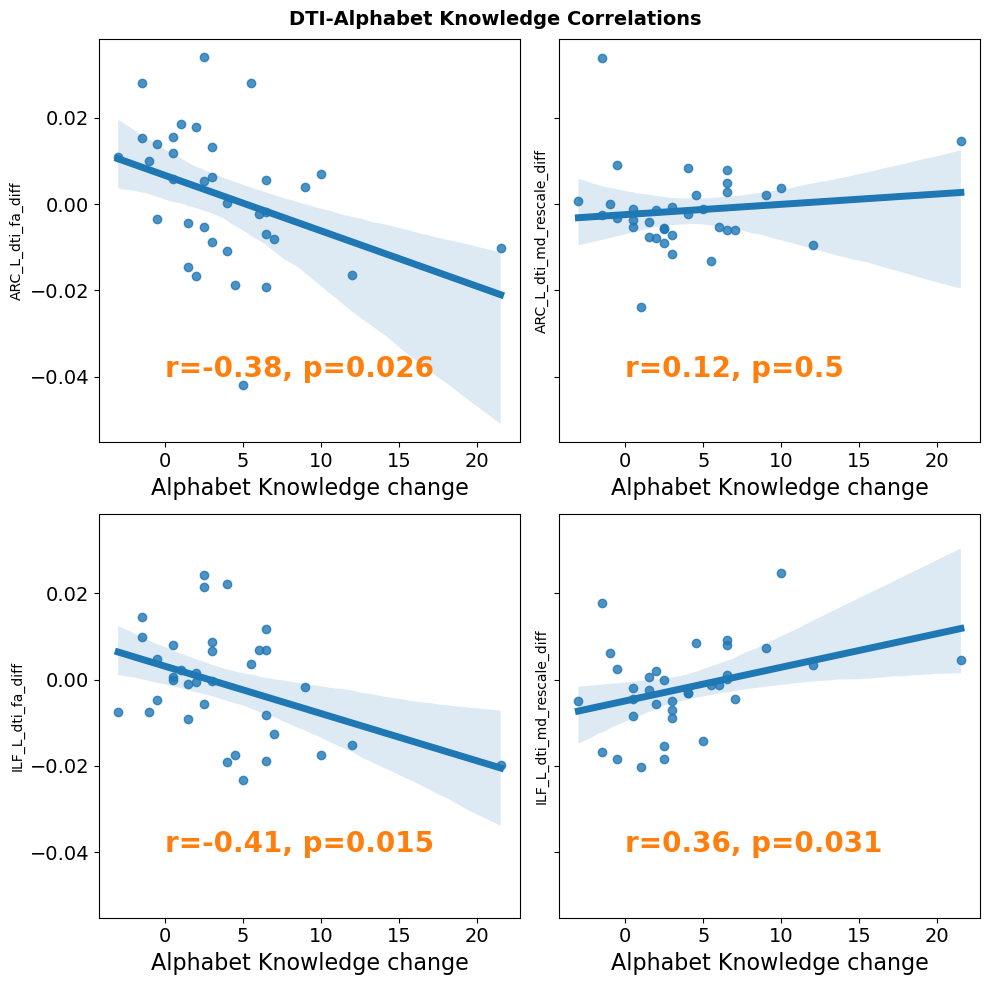

In [28]:
# Check the DTI correlations with behavioral pre/post/diff
sns.set= font_scale=2

fig, axes = plt.subplots(2, 2, figsize=(10, 10),sharey= True)
fig.suptitle('DTI-Alphabet Knowledge Correlations', weight='bold', fontsize= 14)
x_ILF_list = [prek_dti_wide['ILF_L_dti_fa_diff'], prek_dti_wide['ILF_L_dti_md_rescale_diff']]
x_ARC_list = [prek_dti_wide['ARC_L_dti_fa_diff'], prek_dti_wide['ARC_L_dti_md_rescale_diff']]
y = prek_dti_wide["ILF_L_Alph_diff"]
ax_list = [ax1,ax2]

#title_list = ['FA','MD']
#hue = prek_dti_wide['_Group_']

for x_ILF, x_ARC, row in zip(x_ILF_list, x_ARC_list, range(2)):
    g = sns.regplot(y= x_ILF, x= y, line_kws = {'linewidth': 5}, ax = axes[1,row])
    r_ILF, p_ILF = stats.pearsonr(x_ILF, y)
    #g.set_ylim(0,60)
    g.tick_params(axis='both', which='major', labelsize=14)
    g.annotate('r={:.2f}, p={:.2g}'.format(r_ILF, p_ILF),xy= (0, -0.04), xytext= (0, -0.04), color='tab:orange', weight='semibold', fontsize= 20)
    #g.set_ylabel('Left ILF change', size = 16)
    g.set_xlabel('Alphabet Knowledge change', size = 16)
    
    g = sns.regplot(y= x_ARC, x= y, line_kws = {'linewidth': 5}, ax = axes[0,row])
    r_ARC, p_ARC = stats.pearsonr(x_ARC, y)
    #g.set_ylim(0,60)
    g.tick_params(axis='both', which='major', labelsize=14)
    g.annotate('r={:.2f}, p={:.2g}'.format(r_ARC, p_ARC),xy= (0, -0.04), xytext= (0, -0.04), color='tab:orange', weight='semibold', fontsize= 20)
    #g.set_ylabel('Left ILF change', size = 16)
    g.set_xlabel('Alphabet Knowledge change', size = 16)
    
plt.tight_layout()

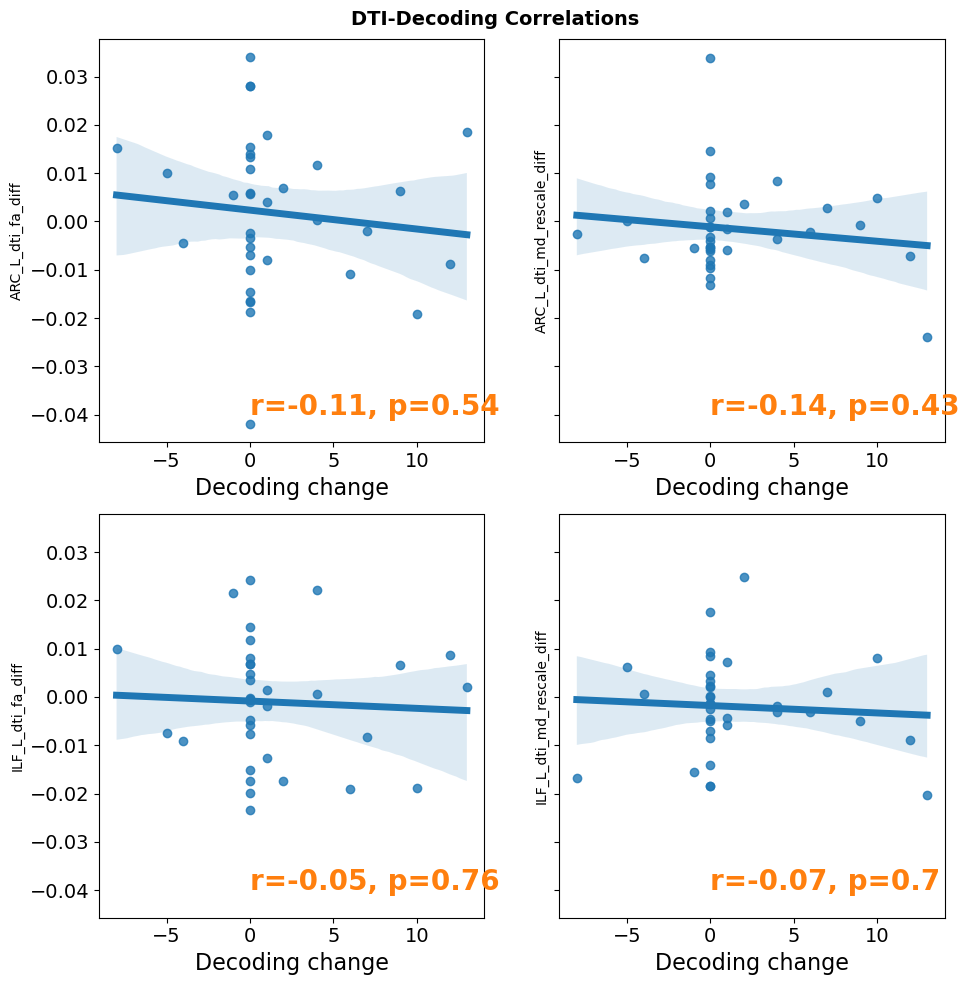

In [29]:
# Check the DTI correlations with behavioral pre/post/diff
sns.set= font_scale=2

fig, axes = plt.subplots(2, 2, figsize=(10, 10),sharey= True)
fig.suptitle('DTI-Decoding Correlations', weight='bold', fontsize= 14)
x_ILF_list = [prek_dti_wide['ILF_L_dti_fa_diff'], prek_dti_wide['ILF_L_dti_md_rescale_diff']]
x_ARC_list = [prek_dti_wide['ARC_L_dti_fa_diff'], prek_dti_wide['ARC_L_dti_md_rescale_diff']]
y = prek_dti_wide["ILF_L_Dec_diff"]
ax_list = [ax1,ax2]

#title_list = ['FA','MD']
#hue = prek_dti_wide['_Group_']

for x_ILF, x_ARC, row in zip(x_ILF_list, x_ARC_list, range(2)):
    g = sns.regplot(y= x_ILF, x= y, line_kws = {'linewidth': 5}, ax = axes[1,row])
    r_ILF, p_ILF = stats.pearsonr(x_ILF, y)
    #g.set_ylim(0,60)
    g.tick_params(axis='both', which='major', labelsize=14)
    g.annotate('r={:.2f}, p={:.2g}'.format(r_ILF, p_ILF),xy= (0, -0.04), xytext= (0, -0.04), color='tab:orange', weight='semibold', fontsize= 20)
    #g.set_ylabel('Left ILF change', size = 16)
    g.set_xlabel('Decoding change', size = 16)
    
    g = sns.regplot(y= x_ARC, x= y, line_kws = {'linewidth': 5}, ax = axes[0,row])
    r_ARC, p_ARC = stats.pearsonr(x_ARC, y)
    #g.set_ylim(0,60)
    g.tick_params(axis='both', which='major', labelsize=14)
    g.annotate('r={:.2f}, p={:.2g}'.format(r_ARC, p_ARC),xy= (0, -0.04), xytext= (0, -0.04), color='tab:orange', weight='semibold', fontsize= 20)
    #g.set_ylabel('Left ILF change', size = 16)
    g.set_xlabel('Decoding change', size = 16)
    
plt.tight_layout()

## Bayesian factors of correlation

In [49]:
pg.bayesfactor_pearson(-0.07, 35, alternative='two-sided')

0.22711662198471294

## Additional correlatioin plots

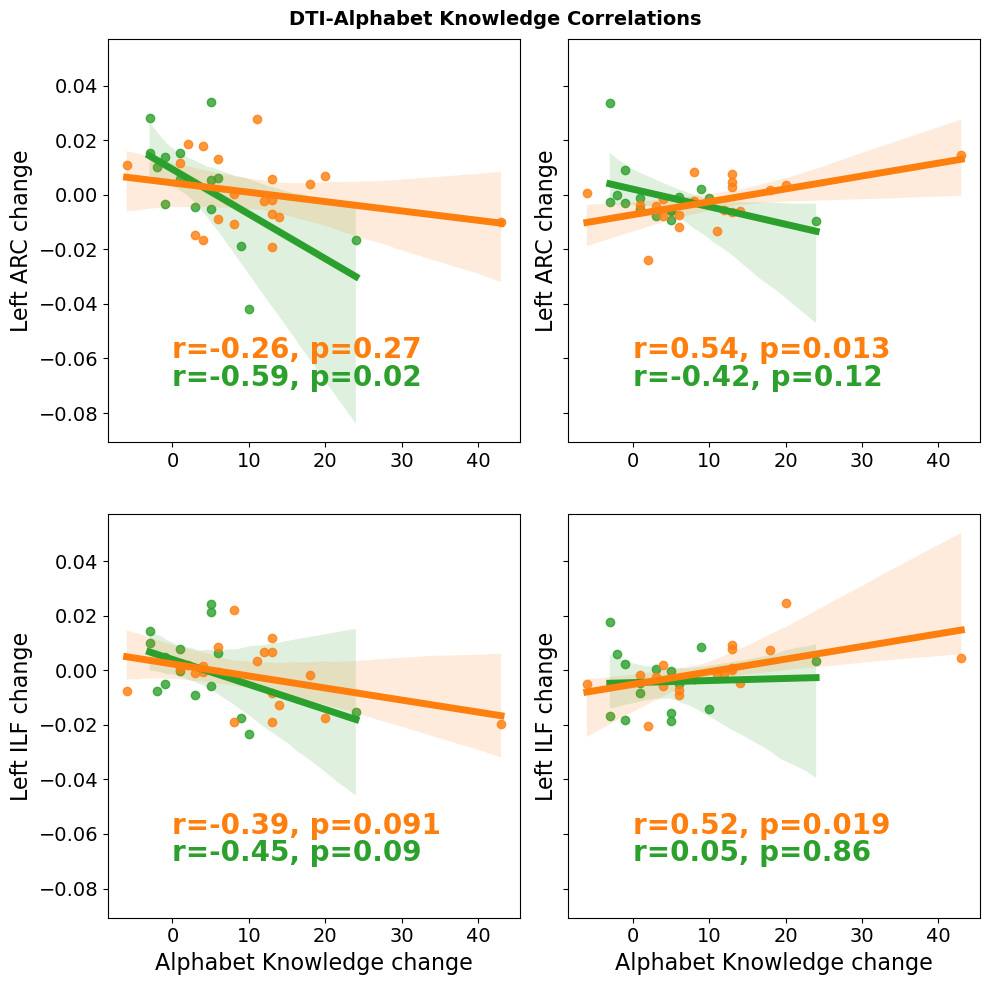

In [19]:
# Check the DTI correlations with behavioral pre/post/diff
sns.set= font_scale=2
prek_wide_lan = prek_dti_wide[prek_dti_wide._Group_ == 1]
prek_wide_let = prek_dti_wide[prek_dti_wide._Group_ == 0]

fig, axes = plt.subplots(2, 2, figsize=(10, 10),sharey= True)
fig.suptitle('DTI-Alphabet Knowledge Correlations', weight='bold', fontsize= 14)
x_ILF_lan_list = [prek_wide_lan['ILF_L_dti_fa_diff'], prek_wide_lan['ILF_L_dti_md_rescale_diff']]
x_ILF_let_list = [prek_wide_let['ILF_L_dti_fa_diff'], prek_wide_let['ILF_L_dti_md_rescale_diff']]
x_ARC_lan_list = [prek_wide_lan['ARC_L_dti_fa_diff'], prek_wide_lan['ARC_L_dti_md_rescale_diff']]
x_ARC_let_list = [prek_wide_let['ARC_L_dti_fa_diff'], prek_wide_let['ARC_L_dti_md_rescale_diff']]
y_lan = prek_wide_lan["ILF_L_Alph_diff"]
y_let = prek_wide_let["ILF_L_Alph_diff"]
#title_list = ['FA','MD']
hue = prek_dti_wide['_Group_']

for x_ILF_lan, x_ARC_lan, x_ILF_let, x_ARC_let, row in zip(x_ILF_lan_list, x_ARC_lan_list, x_ILF_let_list, x_ARC_let_list, range(2)):
    g = sns.regplot(y= x_ILF_lan, x= y_lan, color = 'tab:green', line_kws = {'linewidth': 5}, ax = axes[1,row])
    r_lan, p_lan = stats.pearsonr(x_ILF_lan, y_lan)
    g = sns.regplot(y= x_ILF_let, x= y_let, color = 'tab:orange', line_kws = {'linewidth': 5}, ax = axes[1,row])
    r_let, p_let = stats.pearsonr(x_ILF_let, y_let)
    #g.set_ylim(0,60)
    g.tick_params(axis='both', which='major', labelsize=14)
    g.annotate('r={:.2f}, p={:.2g}'.format(r_let, p_let),xy= (0, -0.06), xytext= (0, -0.06), color='tab:orange', weight='semibold', fontsize= 20)
    g.annotate('r={:.2f}, p={:.2g}'.format(r_lan, p_lan),xy= (0, -0.07), xytext= (0, -0.07), color='tab:green', weight='semibold', fontsize= 20)
    g.set_ylabel('Left ILF change', size = 16)
    g.set_xlabel('Alphabet Knowledge change', size = 16)

    
    g = sns.regplot(y= x_ARC_lan, x= y_lan, color = 'tab:green', line_kws = {'linewidth': 5}, ax = axes[0,row])
    r_lan, p_lan = stats.pearsonr(x_ARC_lan, y_lan)
    g = sns.regplot(y= x_ARC_let, x= y_let, color = 'tab:orange', line_kws = {'linewidth': 5}, ax = axes[0,row])
    r_let, p_let = stats.pearsonr(x_ARC_let, y_let)
    #g.set_ylim(0,60)
    #g.set_xlim(0.35,0.60)
    g.tick_params(axis='both', which='major', labelsize=14)
    g.annotate('r={:.2f}, p={:.2g}'.format(r_let, p_let),xy= (0, -0.06), xytext= (0, -0.06), color='tab:orange', weight='semibold', fontsize= 20)
    g.annotate('r={:.2f}, p={:.2g}'.format(r_lan, p_lan),xy= (0, -0.07), xytext= (0, -0.07), color='tab:green', weight='semibold', fontsize= 20)
    g.set_ylabel('Left ARC change', size = 16)
    g.set_xlabel(' ', size = 16)

    
plt.tight_layout()

In [21]:
fig.savefig('dmri_behav_corr_lILF_clean_n35.tiff', format='tiff', dpi=600)